<a href="https://colab.research.google.com/github/Pa-O-La/jupiter/blob/master/uni_ranlking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University Ranking

In this notebook we analyse the relation between university ranking and the male-female ratio.

We will focus our attention on the Italian university with respect to all the enties in order to investigate the differences.
![University](https://github.com/Pa-O-La/jupiter/blob/master/rank_df_img.PNG?raw=1)

## Dataset descriprion

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. 
The dataset we use in this notebook is based on the Times Higher Education World University.

Further details on the ranking system can be found in https://en.wikipedia.org/wiki/College_and_university_rankings.


### Dataset source
For this notebook, I used the university ranking dataset from the [KAGGLE] site (https://www.kaggle.com/mylesoneill/world-university-rankings#cwurData.csv).


In [1]:
# getting the dataset to local (for google colab)
!wget https://raw.githubusercontent.com/Pa-O-La/jupiter/master/timesData.csv

--2020-05-16 12:41:10--  https://raw.githubusercontent.com/Pa-O-La/jupiter/master/timesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268231 (262K) [text/plain]
Saving to: ‘timesData.csv.1’

timesData.csv.1     100%[===================>] 261.94K  --.-KB/s    in 0.05s   

2020-05-16 12:41:12 (4.93 MB/s) - ‘timesData.csv.1’ saved [268231/268231]



### Import dataset into the notebook

In [0]:
import csv
file_name = './timesData.csv'
fp = open(file_name)
reader = csv.reader(fp)
header = next(reader)

### Daset entries description (name, datatype)

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Pa-O-La/jupiter/master/timesData.csv'
timesdata_pd = pd.read_csv(url)

print(timesdata_pd.dtypes)

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


### Dictionary creation 

In [0]:
timesdata = []
for line in reader:
  d = dict(zip(header, line))
  timesdata.append(d)

Dataset dimension

In [5]:
len(timesdata)

2603

The first university:

In [6]:
print(timesdata_pd.head())

  world_rank                        university_name  ... female_male_ratio  year
0          1                     Harvard University  ...               NaN  2011
1          2     California Institute of Technology  ...           33 : 67  2011
2          3  Massachusetts Institute of Technology  ...           37 : 63  2011
3          4                    Stanford University  ...           42 : 58  2011
4          5                   Princeton University  ...           45 : 55  2011

[5 rows x 14 columns]


## Adding colum with female-male ratio

We handle the exception where the value is not present

In [0]:
for d in range(0, len(timesdata)):
  fmr = None
  try:
    fmr_vett = timesdata[d]['female_male_ratio'].split(':')
    fmr = int(fmr_vett[0]) / int(fmr_vett[1])
    timesdata[d]['fmr'] = fmr
  except:
    timesdata[d]['fmr'] = None

Filtering out None values

In [0]:
timesdata_c = [d for d in timesdata if d['fmr'] is not None]

Number of removed None entry

In [9]:
print('Removed ', len(timesdata) - len(timesdata_c), ' entries')

Removed  238  entries


## Preparation of world_rank data

We count the number of null value of the total score.

In [10]:
counter = 0
for d in timesdata_c:
  try:
    (float(d['total_score']))
  except:
    counter +=1

print('%f', counter/len(timesdata_c))

%f 0.5441860465116279


Instead of throwing the 54% of the dataset entries we use as the score value the word ranking position.

Some entries needs homogenization

In [0]:
for d in timesdata_c:
  if (d['world_rank'].isdigit()):
    rank_num = float(d['world_rank'])
  elif ('-' in d['world_rank']):
    #split on '-'
    tmp = d['world_rank'].split('-')
    rank_num = float(tmp[0]) * 0.5 + float(tmp[1]) * 0.5
  elif ('=' in d['world_rank']):
    tmp = d['world_rank'].split('=')
    rank_num = float(tmp[1]) 
  else:
    rank_num = -1
    print(d['world_rank'])
  
  d['wr_num'] = rank_num 

## Creation of the Italian data subset

In [0]:
data_ita = [d for d in timesdata_c if d['country'] == 'Italy']

Number of Italian entries (over the yers)

In [13]:
len(data_ita)

92

Retreiving years list of the global dataset

In [14]:
from collections import defaultdict
years_g = defaultdict(int)
for d in timesdata_c:
  years_g[d['year']] += 1

print (years_g.keys())

dict_keys(['2011', '2012', '2013', '2014', '2015', '2016'])


Numbers of global entries per year

In [15]:
for d in years_g:
  print (d, ' - ', years_g[d])

2011  -  178
2012  -  362
2013  -  364
2014  -  364
2015  -  362
2016  -  735


## Create annual female-male ratio (fmr)
We store the global and italian average fmr per year in vectors fmr_g and fmr_i, respectively

In [0]:
import numpy
fmr_g = []
fmr_i =[]
for y in years_g.keys():
  tmp = [d['fmr'] for d in timesdata_c if d['year'] == y]
  fmr_mean = numpy.array(tmp).mean()
  fmr_g.append(fmr_mean)

  tmp_ita = [d['fmr'] for d in data_ita if d['year'] == y]
  fmr_mean_ita = 0
  if (len(tmp_ita)>0):
    fmr_mean_ita = numpy.array(tmp_ita).mean()
  fmr_i.append(fmr_mean_ita)

# Data Visualization
## Plot of the fmr_g and fmr_i over years

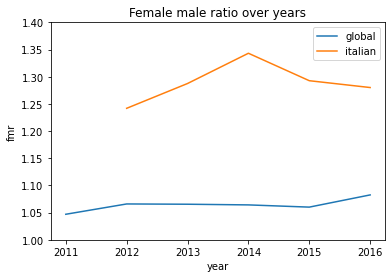

In [17]:
import matplotlib.pyplot as plt

X = list(years_g.keys())
plt.plot(X, fmr_g, label = 'global')
plt.plot(X[1:], fmr_i[1:], label = 'italian')
plt.ylim([1, 1.4])
plt.legend()
plt.ylabel('fmr')
plt.title('Female male ratio over years')
plt.xlabel('year');

The plot show that the italian average fmr is higher than the global one

## Evolution of the global and the italian fmr through years

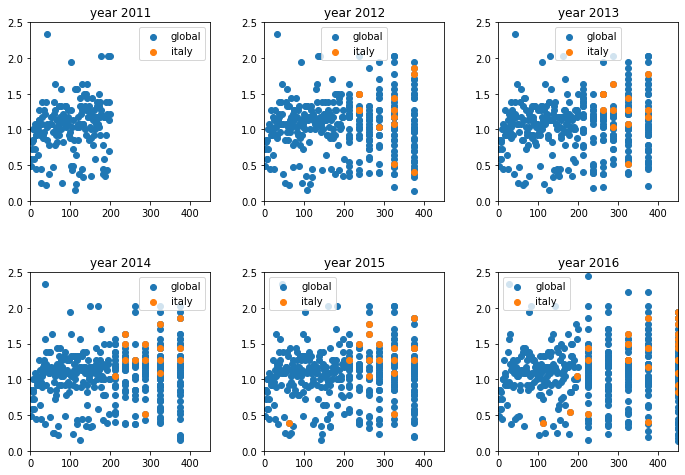

In [18]:
# in the years

fig, axs = plt.subplots(2, 3)
fig.set_size_inches(10, 7)

c = 0
for yy in years_g.keys(): 

  data_per_year_g = [d for d in timesdata_c if d['year'] == yy]
  ranking_y_g = numpy.array([float(d['wr_num']) for d in data_per_year_g])
  fmr_y_g = numpy.array([d['fmr'] for d in data_per_year_g])

  data_per_year_i = [d for d in data_ita if d['year'] == yy]
  ranking_y_i = numpy.array([float(d['wr_num']) for d in data_per_year_i])
  fmr_y_i = numpy.array([d['fmr'] for d in data_per_year_i])


  axs[c//3, c%3].scatter(ranking_y_g, fmr_y_g, label= 'global')
  axs[c//3, c%3].scatter(ranking_y_i, fmr_y_i, label = 'italy')

  axs[c//3, c%3].set_title('year %s' %yy)
  axs[c//3, c%3].set_xlim([0, 450])
  axs[c//3, c%3].set_ylim([0, 2.5])
  axs[c//3, c%3].legend()
  c += 1

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)


The panel shows that through years the average score of italian university increases.

We can also notice that the majority of the entries are clustered around the average value.

### Focusing
We now focus the attention on 2016

Text(0, 0.5, 'fmr')

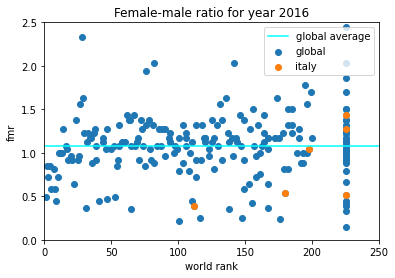

In [19]:
# 2016
yy='2016'
data_2016_g = [d for d in timesdata_c if d['year'] == yy]
ranking_2016_g = numpy.array([float(d['wr_num']) for d in data_2016_g])
fmr_2016_g = numpy.array([d['fmr'] for d in data_2016_g])

data_2016_i = [d for d in data_ita if d['year'] == yy]
ranking_2016_i = numpy.array([float(d['wr_num']) for d in data_2016_i])
fmr_2016_i = numpy.array([d['fmr'] for d in data_2016_i])

plt.plot([0, 250], [fmr_g[-1],fmr_g[-1]], color= 'cyan' , label = 'global average')
plt.scatter(ranking_2016_g, fmr_2016_g, label= 'global')
plt.scatter(ranking_2016_i, fmr_2016_i, label = 'italy')

plt.title('Female-male ratio for year %s' %yy)
plt.xlim([0, 250])
plt.ylim([0, 2.5])
plt.legend()
plt.xlabel('world rank')
plt.ylabel('fmr')


We remark that the lower the rank, the higher the position.

We notice that while the majority of the entries are round the average value, the firsts entries are remarkably below. 

We also notice that all the italian entries, within the first 200, are below the global average.

## Looking for a trend
We split the dataset in group of 10 entries.
Each group contains 10 entries of the university sorted by the rank.

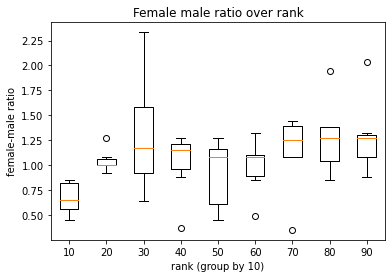

In [20]:
c_fmr = [] 

lowlim = 0 
for c in range (10,100,10):
  uplim = c
  temp = [d['fmr'] for d in data_2016_g if d['wr_num'] > lowlim and d['wr_num'] < uplim ]
  c_fmr.append(temp)
  lowlim = c

plt.boxplot(c_fmr);
plt.title('Female male ratio over rank')
plt.ylabel('female-male ratio')
plt.xlabel('rank (group by 10)')
plt.xticks(range(1, 10), range (10,100,10));

We notice that by grouping the data, the first entries exhibit a lower average fmr with respect to the global one. 